This notebook will mainly be used for the IBM Data Science Capstone Project by IBM and Coursera

In [1]:
import pandas as pd
import numpy as np
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


# Introduction
For this project, I will be comparing neighborhoods clusters in Singapore to those in New York and Toronto to see which are they more similar to. I would ultimately like to answer the question of whether Singapore is more similar to New York or Toronto. 

## Business Problem
The business problem I would like to solve is a hypothetical one. Imagine that there is a Singaporean franchise looking to expand its business overseas, either to New York or Toronto. This company has hired me to determine which neighborhood or neighborhoods is most similar to their most successful branch in Singapore which is located the neighborhood of Orchard. This information will help them determine 1) which country to enter and 2) where to set up their new store or potentially stores. 

## Data
Firstly, I will be gathering the postal codes of neighbors and using the geopy to determine their latitude and longitud. After this, foursquare data can be retrieved and used to compare the neighborhoods. Foursquare data in this situation is sufficient to cluster and segment neighborhoods in the three countries using k-means clustering. Individual neighborhood in the different countries can also be compared through a similarity matrix where their scores are based on the frequency of venues. The country to enter would be determined by the size of the similar cluster as well as the similarity of the cluster to their branch in Singapore.


In [2]:
import pandas as pd
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import numpy as np
from bs4 import BeautifulSoup

# !conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import folium # map rendering library

from sklearn.cluster import KMeans

import json

In [3]:
orchard_lat = 1.3040
orchard_long = 103.8318
map_singapore = folium.Map(location=[orchard_lat, orchard_long], zoom_start=11)
folium.CircleMarker(
        [orchard_lat, orchard_long],
        radius=5,
        color='#3186cc',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_singapore)  

map_singapore

In [4]:
req = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")

soup = BeautifulSoup(req.content,'lxml')

table = soup.find_all('table')[0]

df = pd.read_html(str(table))

neighborhood=pd.DataFrame(df[0])

In [5]:
neighborhood1 = neighborhood[~(neighborhood['Borough'].isin(['Not assigned']))]
neighborhood1.reset_index(drop=True)

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [6]:
geo_df =pd.read_csv('http://cocl.us/Geospatial_data')
geo_merged = pd.merge(neighborhood1, geo_df, on = 'Postal Code')

In [7]:
orchard_data = {'Postal Code': [" "],'Borough':['Singapore'], 'Neighborhood': ['Orchard'], 'Latitude' : [orchard_lat], 'Longitude':[orchard_long]}
orchard_df = pd.DataFrame(orchard_data) 
orchard_df

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,,Singapore,Orchard,1.304,103.8318


In [8]:
df_toronto = geo_merged[geo_merged['Borough'].str.contains('Toronto')]
df_toronto.reset_index(drop = True, inplace = True)
df_toronto = pd.concat([orchard_df, df_toronto])
df_toronto

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,,Singapore,Orchard,1.304000,103.831800
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568


In [9]:
# replace this with your own json file with your credentials
with open('credentials.json') as f:
    data = json.load(f)
    CLIENT_ID = data['username']
    CLIENT_SECRET = data['password']
VERSION = '20180605' # Foursquare API version

In [10]:
address = 'Toronto'

geolocator = Nominatim(user_agent="my_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [11]:

map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [12]:

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
#df_toronto

In [14]:
LIMIT = 100
toronto_venues = getNearbyVenues(names=df_toronto['Neighborhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )

Orchard
Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island a

In [15]:
toronto_venues.groupby('Neighborhood').count()
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))


There are 241 uniques categories.


In [16]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1712,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.shape

(40, 241)

In [18]:

num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.07
1        Cocktail Bar  0.05
2                 Pub  0.04
3  Seafood Restaurant  0.04
4         Cheese Shop  0.04


----Brockton, Parkdale Village, Exhibition Place----
                venue  freq
0                Café  0.14
1         Coffee Shop  0.09
2      Breakfast Spot  0.09
3                 Gym  0.05
4  Italian Restaurant  0.05


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                venue  freq
0  Light Rail Station  0.12
1         Yoga Studio  0.06
2       Auto Workshop  0.06
3          Comic Shop  0.06
4         Pizza Place  0.06


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0    Airport Lounge  0.13
1   Airport Service  0.13
2  Airport Terminal  0.13
3          Boutique  0.07
4           Airport  0.07


----Central Bay Street----
                 venue  

In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [20]:

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Beer Bar,Seafood Restaurant,Restaurant,Pub,Bakery,Café,Cheese Shop,Grocery Store
1,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Coffee Shop,Grocery Store,Furniture / Home Store,Bar,Stadium,Bakery,Italian Restaurant,Climbing Gym
2,"Business reply mail Processing Centre, South C...",Light Rail Station,Yoga Studio,Pizza Place,Smoke Shop,Brewery,Farmers Market,Fast Food Restaurant,Burrito Place,Restaurant,Auto Workshop
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Lounge,Airport Service,Airport Terminal,Boat or Ferry,Sculpture Garden,Airport,Airport Food Court,Boutique,Harbor / Marina,Bar
4,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Japanese Restaurant,Salad Place,Department Store,Restaurant,Bubble Tea Shop,Burger Joint
5,Christie,Grocery Store,Café,Park,Italian Restaurant,Baby Store,Candy Store,Athletics & Sports,Diner,Restaurant,Nightclub
6,Church and Wellesley,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Restaurant,Gay Bar,Café,Pub,Men's Store,Mediterranean Restaurant,Hotel
7,"Commerce Court, Victoria Hotel",Coffee Shop,Café,Restaurant,Hotel,American Restaurant,Gym,Italian Restaurant,Japanese Restaurant,Deli / Bodega,Seafood Restaurant
8,Davisville,Sandwich Place,Dessert Shop,Gym,Italian Restaurant,Café,Pizza Place,Sushi Restaurant,Coffee Shop,Diner,Deli / Bodega
9,Davisville North,Sandwich Place,Park,Gym / Fitness Center,Breakfast Spot,Hotel,Department Store,Food & Drink Shop,Women's Store,Diner,Discount Store


In [21]:
neighborhoods_venues_sorted.iloc[22].to_frame()

,22
Neighborhood,Orchard
1st Most Common Venue,Boutique
2nd Most Common Venue,Sushi Restaurant
3rd Most Common Venue,Bakery
4th Most Common Venue,Hotel
5th Most Common Venue,Cosmetics Shop
6th Most Common Venue,Shopping Mall
7th Most Common Venue,Japanese Restaurant
8th Most Common Venue,Asian Restaurant
9th Most Common Venue,Bubble Tea Shop


In [22]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

In [23]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(toronto_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

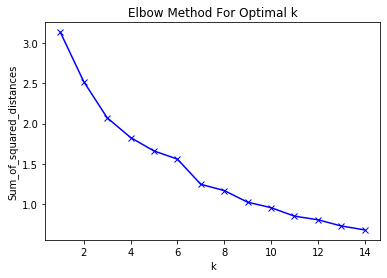

In [24]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [25]:
# set number of clusters
kclusters = 6


# run k-means clustering
kmeans = KMeans(init = "k-means++", n_clusters=kclusters,n_init = 12, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.predict(toronto_grouped_clustering)
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 5])

In [26]:

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,,Singapore,Orchard,1.304000,103.831800,0,Boutique,Sushi Restaurant,Bakery,Hotel,Cosmetics Shop,Shopping Mall,Japanese Restaurant,Asian Restaurant,Bubble Tea Shop,Chinese Restaurant
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Bakery,Pub,Park,Breakfast Spot,Restaurant,Café,Theater,Dessert Shop,Chocolate Shop
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Sushi Restaurant,Yoga Studio,College Cafeteria,Beer Bar,Smoothie Shop,Sandwich Place,Burger Joint,Burrito Place,Café
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Clothing Store,Coffee Shop,Japanese Restaurant,Cosmetics Shop,Bubble Tea Shop,Italian Restaurant,Middle Eastern Restaurant,Café,Fast Food Restaurant,Bookstore
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Café,Coffee Shop,Restaurant,Cocktail Bar,Gastropub,American Restaurant,Clothing Store,Italian Restaurant,Moroccan Restaurant,Cosmetics Shop


In [27]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [28]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Singapore,0,Boutique,Sushi Restaurant,Bakery,Hotel,Cosmetics Shop,Shopping Mall,Japanese Restaurant,Asian Restaurant,Bubble Tea Shop,Chinese Restaurant
0,Downtown Toronto,0,Coffee Shop,Bakery,Pub,Park,Breakfast Spot,Restaurant,Café,Theater,Dessert Shop,Chocolate Shop
1,Downtown Toronto,0,Coffee Shop,Sushi Restaurant,Yoga Studio,College Cafeteria,Beer Bar,Smoothie Shop,Sandwich Place,Burger Joint,Burrito Place,Café
2,Downtown Toronto,0,Clothing Store,Coffee Shop,Japanese Restaurant,Cosmetics Shop,Bubble Tea Shop,Italian Restaurant,Middle Eastern Restaurant,Café,Fast Food Restaurant,Bookstore
3,Downtown Toronto,0,Café,Coffee Shop,Restaurant,Cocktail Bar,Gastropub,American Restaurant,Clothing Store,Italian Restaurant,Moroccan Restaurant,Cosmetics Shop
4,East Toronto,0,Trail,Pub,Health Food Store,Dog Run,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Women's Store
5,Downtown Toronto,0,Coffee Shop,Cocktail Bar,Beer Bar,Seafood Restaurant,Restaurant,Pub,Bakery,Café,Cheese Shop,Grocery Store
6,Downtown Toronto,0,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Japanese Restaurant,Salad Place,Department Store,Restaurant,Bubble Tea Shop,Burger Joint
7,Downtown Toronto,0,Grocery Store,Café,Park,Italian Restaurant,Baby Store,Candy Store,Athletics & Sports,Diner,Restaurant,Nightclub
8,Downtown Toronto,0,Coffee Shop,Café,Restaurant,Thai Restaurant,Hotel,Deli / Bodega,Gym,Clothing Store,Pizza Place,Sushi Restaurant


In [29]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Central Toronto,1,Trail,Park,Sushi Restaurant,Jewelry Store,Dog Run,Dessert Shop,Diner,Discount Store,Distribution Center,Women's Store
33,Downtown Toronto,1,Park,Playground,Trail,Dance Studio,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run


toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

In [30]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Central Toronto,2,Park,Swim School,Bus Line,Department Store,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


In [31]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Central Toronto,3,Pool,Garden,Women's Store,Dance Studio,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run


In [32]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Central Toronto,4,Park,Summer Camp,Restaurant,Dance Studio,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run


In [33]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,Central Toronto,5,Sandwich Place,Park,Gym / Fitness Center,Breakfast Spot,Hotel,Department Store,Food & Drink Shop,Women's Store,Diner,Discount Store


### New York Data

In [35]:
import json # library to handle JSON files
import urllib.request
url = 'https://cocl.us/new_york_dataset'
filename = 'newyork_data.json'
urllib.request.urlretrieve(url, filename)

('newyork_data.json', <http.client.HTTPMessage at 0x1ed9f89c6c8>)

In [36]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [37]:
neighborhoods_data = newyork_data['features']

In [38]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [39]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [40]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [41]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
orchard_data = {'Borough':['Singapore'], 'Neighborhood': ['Orchard'], 'Latitude' : [orchard_lat], 'Longitude':[orchard_long]}
orchard_df = pd.DataFrame(orchard_data) 
manhattan_data = pd.concat([orchard_df, manhattan_data])
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Singapore,Orchard,1.304000,103.831800
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210


In [42]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [43]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [44]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Orchard
Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [45]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3206, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Orchard,1.304,103.8318,The Other Room,1.305297,103.832860,Speakeasy
1,Orchard,1.304,103.8318,Singapore Marriott Tang Plaza Hotel,1.305215,103.832967,Hotel
2,Orchard,1.304,103.8318,ION Orchard,1.304261,103.831846,Shopping Mall
3,Orchard,1.304,103.8318,SEPHORA,1.304699,103.831726,Cosmetics Shop
4,Orchard,1.304,103.8318,Awfully Chocolate,1.303767,103.831874,Chocolate Shop


In [46]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,66,66,66,66,66,66
Carnegie Hill,83,83,83,83,83,83
Central Harlem,44,44,44,44,44,44
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,97,97,97,97,97,97
Clinton,100,100,100,100,100,100
East Harlem,42,42,42,42,42,42
East Village,100,100,100,100,100,100


In [47]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Orchard,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Orchard,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Orchard,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Orchard,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Orchard,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
manhattan_onehot.shape

(3206, 338)

In [49]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Battery Park City,0.000000,0.00,0.00,0.000000,0.015152,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.015152,0.015152,0.000000,0.015152,0.000000
1,Carnegie Hill,0.000000,0.00,0.00,0.000000,0.012048,0.000000,0.000000,0.000000,0.012048,...,0.00,0.024096,0.000000,0.000000,0.000000,0.012048,0.036145,0.000000,0.000000,0.036145
2,Central Harlem,0.000000,0.00,0.00,0.068182,0.045455,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Chelsea,0.000000,0.00,0.00,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.000000,0.010000,0.000000
4,Chinatown,0.000000,0.00,0.00,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
5,Civic Center,0.000000,0.00,0.00,0.000000,0.041237,0.010309,0.000000,0.000000,0.000000,...,0.00,0.010309,0.000000,0.000000,0.010309,0.010309,0.010309,0.010309,0.000000,0.020619
6,Clinton,0.000000,0.00,0.00,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.010000,0.030000,0.000000,0.000000,0.000000
7,East Harlem,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,East Village,0.000000,0.00,0.00,0.000000,0.010000,0.000000,0.000000,0.010000,0.010000,...,0.00,0.020000,0.000000,0.000000,0.000000,0.030000,0.010000,0.000000,0.000000,0.000000
9,Financial District,0.000000,0.00,0.00,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.010000,0.010000


In [50]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0           Park  0.12
1    Coffee Shop  0.06
2          Hotel  0.06
3            Gym  0.05
4  Memorial Site  0.05


----Carnegie Hill----
         venue  freq
0  Coffee Shop  0.10
1         Café  0.05
2  Pizza Place  0.05
3  Yoga Studio  0.04
4          Gym  0.04


----Central Harlem----
                venue  freq
0  African Restaurant  0.07
1  Seafood Restaurant  0.05
2                 Bar  0.05
3   French Restaurant  0.05
4      Cosmetics Shop  0.05


----Chelsea----
            venue  freq
0     Art Gallery  0.09
1     Coffee Shop  0.07
2  Ice Cream Shop  0.04
3            Café  0.04
4          Bakery  0.03


----Chinatown----
                venue  freq
0  Chinese Restaurant  0.06
1              Bakery  0.05
2     Bubble Tea Shop  0.04
3        Cocktail Bar  0.04
4                 Spa  0.03


----Civic Center----
                 venue  freq
0          Coffee Shop  0.07
1    French Restaurant  0.05
2                Hotel  0.05
3   

In [51]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Gym,Memorial Site,Gourmet Shop,Food Court,Boat or Ferry,Shopping Mall,Plaza
1,Carnegie Hill,Coffee Shop,Café,Pizza Place,Yoga Studio,Wine Shop,Japanese Restaurant,Gym,Bookstore,French Restaurant,Shipping Store
2,Central Harlem,African Restaurant,Seafood Restaurant,American Restaurant,Bar,French Restaurant,Cosmetics Shop,Chinese Restaurant,Caribbean Restaurant,Boutique,Beer Bar
3,Chelsea,Art Gallery,Coffee Shop,Ice Cream Shop,Café,American Restaurant,Bakery,Park,Cycle Studio,Cupcake Shop,Market
4,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,Bubble Tea Shop,Spa,American Restaurant,Optical Shop,Vietnamese Restaurant,Coffee Shop,Ice Cream Shop


In [52]:
manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

In [53]:
Sum_of_squared_distances_two = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(manhattan_grouped_clustering)
    Sum_of_squared_distances_two.append(km.inertia_)

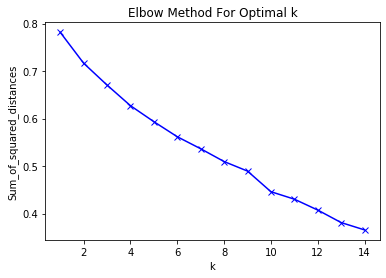

In [54]:
plt.plot(K, Sum_of_squared_distances_two, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [55]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(init = "k-means++", n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 0, 2, 3, 0, 2, 3, 3, 2])

In [56]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Singapore,Orchard,1.304000,103.831800,2,Boutique,Hotel,Sushi Restaurant,Bakery,Shopping Mall,Cosmetics Shop,Chinese Restaurant,Bubble Tea Shop,Indonesian Restaurant,Asian Restaurant
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Sandwich Place,Gym,Coffee Shop,Yoga Studio,Deli / Bodega,Supplement Shop,Steakhouse,Shopping Mall,Seafood Restaurant,Pizza Place
1,Manhattan,Chinatown,40.715618,-73.994279,3,Chinese Restaurant,Bakery,Cocktail Bar,Bubble Tea Shop,Spa,American Restaurant,Optical Shop,Vietnamese Restaurant,Coffee Shop,Ice Cream Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,3,Café,Bakery,Grocery Store,Chinese Restaurant,Spanish Restaurant,Mobile Phone Shop,Latin American Restaurant,Bank,Mexican Restaurant,Tapas Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Lounge,Café,Restaurant,Park,Bakery,Frozen Yogurt Shop,Caribbean Restaurant,Chinese Restaurant,Spanish Restaurant


In [57]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [58]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Manhattanville,Coffee Shop,Seafood Restaurant,Mexican Restaurant,Park,Italian Restaurant,Gastropub,Bike Trail,Falafel Restaurant,Farmers Market,Boutique
6,Central Harlem,African Restaurant,Seafood Restaurant,American Restaurant,Bar,French Restaurant,Cosmetics Shop,Chinese Restaurant,Caribbean Restaurant,Boutique,Beer Bar
9,Yorkville,Coffee Shop,Gym,Italian Restaurant,Bar,Sushi Restaurant,Deli / Bodega,Japanese Restaurant,Wine Shop,Diner,Mexican Restaurant
11,Roosevelt Island,Park,Coffee Shop,Residential Building (Apartment / Condo),Scenic Lookout,Sandwich Place,Metro Station,Liquor Store,Supermarket,Greek Restaurant,Outdoors & Recreation
12,Upper West Side,Bar,Italian Restaurant,Dessert Shop,Wine Bar,Indian Restaurant,Yoga Studio,Seafood Restaurant,Pub,Pizza Place,Middle Eastern Restaurant
13,Lincoln Square,Plaza,Italian Restaurant,Café,Concert Hall,Performing Arts Venue,Theater,French Restaurant,Indie Movie Theater,Wine Shop,Gym / Fitness Center
18,Greenwich Village,Italian Restaurant,Café,Sushi Restaurant,Pizza Place,Gym,Mediterranean Restaurant,Caribbean Restaurant,Sandwich Place,Chinese Restaurant,Clothing Store
21,Tribeca,Park,Italian Restaurant,American Restaurant,Spa,Bakery,Coffee Shop,Café,Wine Bar,Playground,Skate Park
24,West Village,Italian Restaurant,Wine Bar,New American Restaurant,Cocktail Bar,Park,American Restaurant,Bakery,Coffee Shop,Pizza Place,Jazz Club
26,Morningside Heights,Park,Bookstore,Coffee Shop,American Restaurant,Burger Joint,Sandwich Place,Deli / Bodega,Ice Cream Shop,Donut Shop,Supermarket


In [59]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Park,Boat or Ferry,Baseball Field,Pet Service,Cocktail Bar,Fountain,Bar,Harbor / Marina,Farmers Market,Bistro


In [60]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Orchard,Boutique,Hotel,Sushi Restaurant,Bakery,Shopping Mall,Cosmetics Shop,Chinese Restaurant,Bubble Tea Shop,Indonesian Restaurant,Asian Restaurant
0,Marble Hill,Sandwich Place,Gym,Coffee Shop,Yoga Studio,Deli / Bodega,Supplement Shop,Steakhouse,Shopping Mall,Seafood Restaurant,Pizza Place
8,Upper East Side,Italian Restaurant,Bakery,Coffee Shop,Gym / Fitness Center,Yoga Studio,Wine Shop,Juice Bar,French Restaurant,Exhibit,Spa
10,Lenox Hill,Coffee Shop,Pizza Place,Italian Restaurant,Café,Sushi Restaurant,Cocktail Bar,Burger Joint,Gym / Fitness Center,Gym,Sporting Goods Shop
14,Clinton,Theater,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Spa,Gym,Hotel,Thai Restaurant,Cocktail Bar,Sandwich Place
15,Midtown,Coffee Shop,Hotel,Theater,Bakery,Pizza Place,Japanese Restaurant,Clothing Store,Cuban Restaurant,Sushi Restaurant,Salon / Barbershop
16,Murray Hill,Hotel,Sandwich Place,Coffee Shop,Pizza Place,Gym / Fitness Center,Burger Joint,Steakhouse,Juice Bar,Bar,Grocery Store
17,Chelsea,Art Gallery,Coffee Shop,Ice Cream Shop,Café,American Restaurant,Bakery,Park,Cycle Studio,Cupcake Shop,Market
22,Little Italy,Pizza Place,Spa,Bubble Tea Shop,Italian Restaurant,Ice Cream Shop,Mediterranean Restaurant,Bakery,Thai Restaurant,Sandwich Place,Chinese Restaurant
23,Soho,Italian Restaurant,Mediterranean Restaurant,Sandwich Place,Coffee Shop,Ice Cream Shop,Bakery,Dessert Shop,Sushi Restaurant,Spa,French Restaurant


In [61]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,Bubble Tea Shop,Spa,American Restaurant,Optical Shop,Vietnamese Restaurant,Coffee Shop,Ice Cream Shop
2,Washington Heights,Café,Bakery,Grocery Store,Chinese Restaurant,Spanish Restaurant,Mobile Phone Shop,Latin American Restaurant,Bank,Mexican Restaurant,Tapas Restaurant
3,Inwood,Mexican Restaurant,Lounge,Café,Restaurant,Park,Bakery,Frozen Yogurt Shop,Caribbean Restaurant,Chinese Restaurant,Spanish Restaurant
4,Hamilton Heights,Pizza Place,Deli / Bodega,Coffee Shop,Mexican Restaurant,Café,Yoga Studio,Sushi Restaurant,Sandwich Place,Park,Cocktail Bar
7,East Harlem,Mexican Restaurant,Bakery,Thai Restaurant,Latin American Restaurant,Deli / Bodega,Taco Place,Grocery Store,Café,Liquor Store,Cocktail Bar
19,East Village,Cocktail Bar,Mexican Restaurant,Bar,Pizza Place,Coffee Shop,Ramen Restaurant,Wine Bar,Ice Cream Shop,Juice Bar,Japanese Restaurant
20,Lower East Side,Chinese Restaurant,Cocktail Bar,Bakery,Park,Ramen Restaurant,Café,Art Gallery,Clothing Store,Grocery Store,Mediterranean Restaurant
25,Manhattan Valley,Coffee Shop,Yoga Studio,Pizza Place,Bar,Mexican Restaurant,Café,Korean Restaurant,Latin American Restaurant,Grocery Store,Bike Shop
27,Gramercy,Bagel Shop,Coffee Shop,Pizza Place,Bar,Playground,Mexican Restaurant,Cocktail Bar,American Restaurant,Italian Restaurant,Grocery Store


In [64]:
manhattan_merged.groupby('Cluster Labels').count()

,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Cluster Labels,,,,,,,,,,,,,,
0,16,16,16,16,16,16,16,16,16,16,16,16,16,16
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,15,15,15,15,15,15,15,15,15,15,15,15,15,15
3,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [65]:
toronto_merged.groupby('Cluster Labels').count()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Cluster Labels,,,,,,,,,,,,,,,
0,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
